### Import

In [33]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import KNNImputer

import sys
sys.path.append('../scripts')

from preprocessing import clear_missing_data, delete_columnns_treshold, non_useful_columns, clear_missing_line, get_numerical, get_categorical, removal_of_duplicates
from pretraitement import imputation_of_categorical_val, imputation_of_numerical_val, onehotencoder
from training import determine_clusters, train_kmeans,predict_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Collecte de données

### Chargement du dataset

In [34]:
# Je charge le dataset en ne prenant que les 100 premières lignes afin de tester les fonctions
path = "../data/dataset_10000.csv" # Chemin du dataset 
df = pd.read_csv(path, nrows=10000, sep=',',encoding="utf-8")

C:\Users\Rimec\AppData\Local\Temp\ipykernel_20856\812755785.py:3: DtypeWarning: Columns (12,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, nrows=10000, sep=',',encoding="utf-8")


In [35]:
df.shape

(10000, 207)

### Préparation des données

##### Nettoyage des colonnes

In [36]:
# Suppressions des colonnes avec 100% données manquantes
df = clear_missing_data(df)

Nombre de colonnes vides (100% de valeurs manquantes) : 58


In [37]:
# Suppressions des colonnes avec 70% données manquantes
df = delete_columnns_treshold(df)

Les colonnes supprimées sont : Index(['alpha-linolenic-acid_100g', 'lactose_100g', 'beta-carotene_100g',
       'sucrose_100g', 'chloride_100g', 'chlorophyl_100g',
       'carbon-footprint_100g', 'omega-6-fat_100g', 'arachidic-acid_100g',
       'energy-from-fat_100g', 'starch_100g', 'omega-3-fat_100g', 'cocoa_100g',
       'folates_100g', 'molybdenum_100g', 'chromium_100g',
       'abbreviated_product_name', 'fruits-vegetables-nuts-dried_100g',
       'fruits-vegetables-nuts-estimate_100g', 'caffeine_100g',
       'fruits-vegetables-nuts_100g', 'vitamin-k_100g', 'iodine_100g',
       'biotin_100g', 'selenium_100g',
       'carbon-footprint-from-meat-or-fish_100g', 'polyols_100g',
       'vitamin-b12_100g', 'vitamin-b9_100g', 'pantothenic-acid_100g',
       'copper_100g', 'vitamin-e_100g', 'manganese_100g', 'packaging_text',
       'zinc_100g', 'phosphorus_100g', 'first_packaging_code_geo',
       'vitamin-b6_100g', 'cities_tags', 'magnesium_100g', 'vitamin-pp_100g',
       'alcohol_10

In [38]:
# Supposons que df_cluster est votre DataFrame
column_names = df.columns

# Chemin du fichier où les noms des colonnes seront écrits
file_path = 'column_names.txt'

# Écrire les noms des colonnes dans un fichier
with open(file_path, 'w') as file:
    file.write("Noms des colonnes dans df_cluster :\n")
    for column in column_names:
        file.write(f" - {column}\n")

print(f"Les noms des colonnes ont été écrits dans le fichier : {file_path}")


Les noms des colonnes ont été écrits dans le fichier : column_names.txt


In [39]:
# Suppressions des colonnes non pertinentes
df = non_useful_columns(df)



Les colonnes supprimées sont : ['Unnamed: 0', 'url', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 'brands_tags', 'last_updated_datetime', 'countries_tags', 'countries_en', 'states_tags', 'states_en', 'image_url', 'image_small_url', 'image_nutrition_url', 'image_nutrition_small_url', 'last_image_datetime']


##### Nettoyage des lignes

In [40]:
# Suppressions des lignes vides

df = clear_missing_line(df)

Nombre de lignes vides (100% de valeurs manquantes) : 0


#### Supression des doublons

In [41]:
# Netoyage des doublons
df = removal_of_duplicates(df)

### Imputation des données

In [42]:
df_num = df.select_dtypes(include=['number'])  # Garder uniquement les colonnes numériques
df_cat = df.select_dtypes(exclude=['number'])  # Garder uniquement les colonnes catégorielles



In [43]:
# Imputation des valeurs manquantes pour les colonnes numériques
df_num = imputation_of_numerical_val(df_num) 

In [44]:
# Imputation des valeurs manquantes pour les colonnes catégorielles
df_cat = imputation_of_categorical_val(df_cat)

In [45]:
# Assurer que df_num et df_cat ont les mêmes index que df
df[df_num.columns] = df_num
df[df_cat.columns] = df_cat


In [46]:
df

,code,creator,product_name,quantity,brands,categories,categories_tags,categories_en,labels,labels_tags,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,54,kiliweb,Limonade artisanale a la rose,1pcs,Spartan,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,254.468,1064.4,8.432000,1.170000,17.714000,5.980000,5.848000,27.790000,0.911000,0.364400
1,63,kiliweb,Mozzarella Schnittfest Gerieben 45% Fett,1pcs,Gut & Gunstig,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,332.000,1389.0,25.000000,17.300000,3.000000,1.000000,5.817167,23.000000,1.200000,0.480000
2,114,kiliweb,Chocolate n 3,80 g,Jeff de Bruges,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages","Point Vert, Fabriqué en France","en:green-dot,en:made-in-france",...,581.600,2415.0,44.000000,28.000000,30.000000,27.000000,10.292500,7.100000,0.025000,0.010000
3,1,inf,Poulet fermier,300g,nortembio,Tè verde,"en:beverages-and-beverages-preparations,en:pla...","Beverages and beverages preparations,Plant-bas...","No gluten, Organic, Vegetarian, EU Organic, Ko...","en:no-gluten,en:organic,en:vegetarian,en:eu-or...",...,262.668,1098.8,5.952000,1.170000,13.914000,5.980000,5.848000,39.470000,0.911000,0.364400
4,105,kiliweb,Paleta gran reserva - Sierra nevada-,750ml,AdvoCare,"Bebidas y preparaciones de bebidas, Bebidas","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,316.800,1325.4,5.752000,1.312500,14.918000,3.500000,19.488000,39.586000,0.860400,0.344200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15608,openfoodfacts-contributors,IsaLean Shake,1pcs,Gerber,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,215.400,901.2,15.961905,1.620952,22.200606,5.620952,4.845281,32.279394,1.087134,0.434854
9996,15609,foodvisor,Thé vert Matcha Japonais Bio,1pcs,NaturaleBio,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,374.000,1565.0,5.300000,0.300000,40.000000,8.000000,9.407407,30.000000,0.787531,0.315012
9997,15611,kiliweb,Avena crunchy,1pcs,Hacendado,"Alimentos y bebidas de origen vegetal, Aliment...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",en:high-fibres,"en:source-of-fibre,en:high-fibres",...,390.000,1632.0,5.800000,1.000000,66.000000,4.600000,11.000000,13.000000,0.200000,0.080000
9998,1561477671,kiliweb,Valériane stress someil,1pcs,Spartan,"Snacks, Sweet snacks, Confectioneries","en:beverages-and-beverages-preparations,en:bev...","Beverages and beverages preparations,Beverages",Senza glutine,en:no-gluten,...,213.600,893.4,10.026000,3.720000,21.656000,7.596000,4.862000,7.382000,2.336500,0.934800


### Pretraitement

In [47]:
df = onehotencoder(df)

### Entrainement 

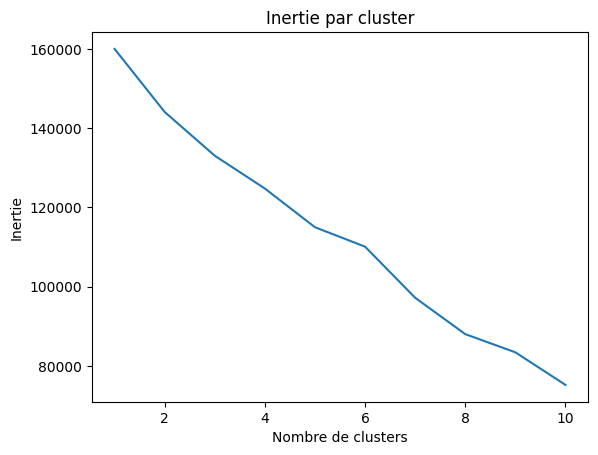

<module 'matplotlib.pyplot' from 'd:\\Logiciel\\conda\\envs\\clustering_OFF\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [48]:
# Normalisation des données (important pour K-Means)
from sklearn.discriminant_analysis import StandardScaler



# Normaliser les colonnes numériques uniquement
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

# Réassembler les données (optionnel : si besoin de garder les catégories)
df_scaled = pd.concat([df_num_scaled, df_cat], axis=1)

# Étape 1 : Trouver le bon nombre de clusters
determine_clusters(df_num_scaled)



In [49]:
# Étape 2 : Entraîner le modèle avec un nombre de clusters optimal (ex: 4)
model = train_kmeans(df_num, nb_clusters=6)

In [50]:
predictions = predict_data(model, df_num)



In [51]:
import pandas as pd

# Ajouter les prédictions au DataFrame
df_num['Cluster'] = predictions

# Afficher les premières lignes du DataFrame avec les clusters
print(df_num.head())


   code  serving_quantity  product_quantity  unique_scans_n  completeness  \
0    54             126.2             296.0             1.4        0.1625   
1    63              42.2             296.0             1.0        0.4625   
2   114              41.6              80.0             1.0        0.4750   
3     1             126.2             300.0             1.0        0.8875   
4   105               5.0             750.0             1.0        0.6750   

   last_image_t  energy-kcal_100g  energy_100g  fat_100g  saturated-fat_100g  \
0  1.733085e+09           254.468       1064.4     8.432              1.1700   
1  1.739903e+09           332.000       1389.0    25.000             17.3000   
2  1.737248e+09           581.600       2415.0    44.000             28.0000   
3  1.741987e+09           262.668       1098.8     5.952              1.1700   
4  1.738074e+09           316.800       1325.4     5.752              1.3125   

   carbohydrates_100g  sugars_100g  fiber_100g  proteins

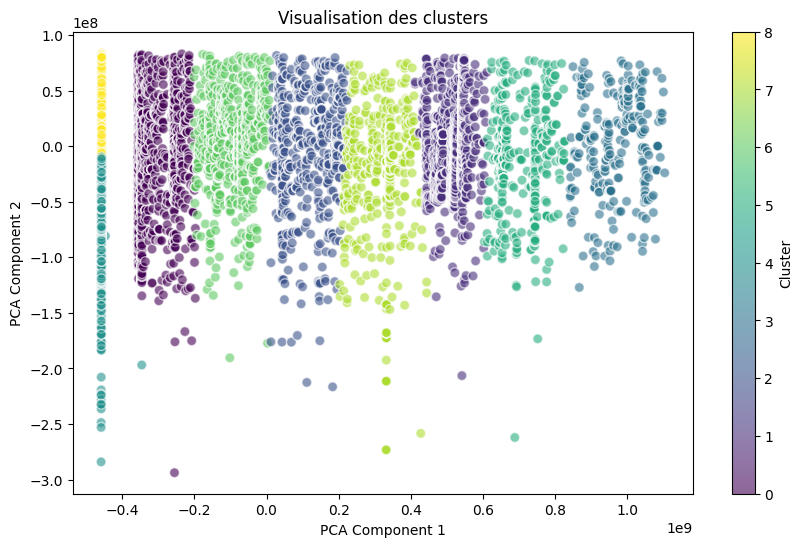

In [52]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Réduire les dimensions à 2 pour la visualisation
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Visualiser les clusters
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=predictions, cmap='viridis', alpha=0.6, edgecolors='w', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Visualisation des clusters')
plt.colorbar(label='Cluster')
plt.show()


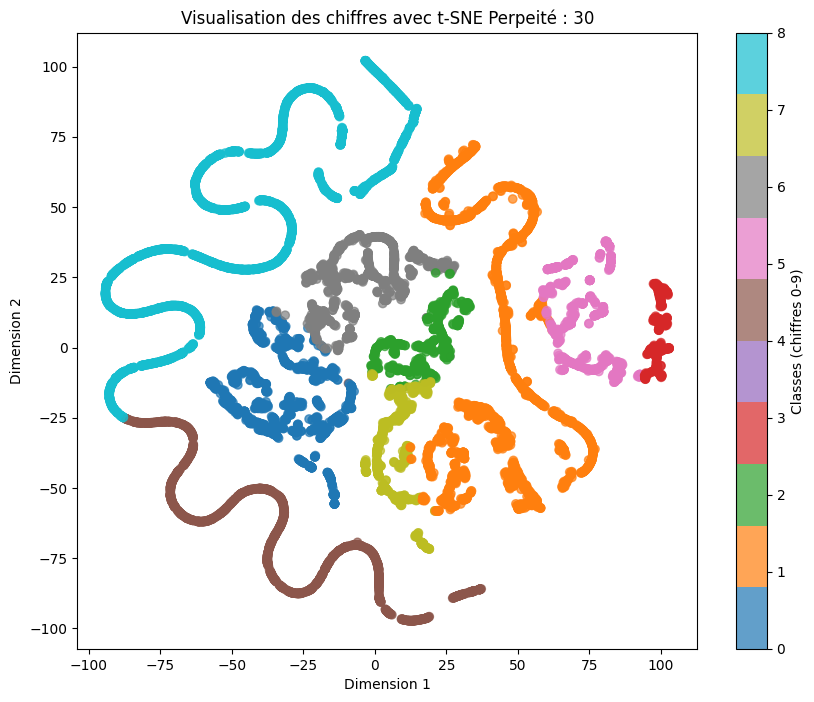

In [53]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# Réduction à 2 dimensions ici, mais vous pouvez choisir un autre nombre si nécessaire
pca = PCA(n_components=2)  
df_pca = pca.fit_transform(df_num.drop(columns=['Cluster']))

# Application de t-SNE pour réduire à 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(df_pca)

# Visualisation des résultats
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=predictions, cmap="tab10", alpha=0.7)
plt.colorbar(scatter, label="Classes (chiffres 0-9)")
plt.title("Visualisation des chiffres avec t-SNE Perpeité : 30")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
#

In [54]:
# Taille des clusters
cluster_sizes = df_num['Cluster'].value_counts()
print("Taille des clusters :")
print(cluster_sizes)

# Statistiques descriptives par cluster
cluster_stats = df_num.groupby('Cluster').mean()
print("Statistiques descriptives par cluster :")
print(cluster_stats)


Taille des clusters :
Cluster
8    2262
1    2147
4    1325
0    1236
6     950
5     657
2     589
7     548
3     286
Name: count, dtype: int64
Statistiques descriptives par cluster :
                 code  serving_quantity  product_quantity  unique_scans_n  \
Cluster                                                                     
0        1.479462e+08        139.504876        415.518720        1.509871   
1        9.857563e+08         88.438522        432.174488        1.194783   
2        5.716894e+08         84.712623        336.903109        1.229881   
3        1.428478e+09        128.412168        276.573946        1.206294   
4        9.999776e+04        128.904123        473.885038        1.388679   
5        1.152508e+09        142.408129        496.545634        1.259665   
6        3.633588e+08         93.826168        384.898586        1.269053   
7        7.777446e+08         88.714638        257.975350        1.110584   
8        4.561693e+03        133.857860     

In [59]:
from visualize import word_cloud_for_cluster


word_cloud_for_cluster(df_cat, cluster_number=7, predictions=predictions) 
# Afficher le nuage de mots pour le cluster 

Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_creator.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_product_name.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_quantity.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_brands.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_categories.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_categories_tags.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_categories_en.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_labels.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_labels_tags.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_labels_en.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_countries.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_serving_size.png
Image sauvegardée : ../../image/clusters/wordcloud_cluster_7_nutriscore_grade.png
Image sa

In [ ]:
# Supposons que df soit ton DataFrame principal et predictions soit ton array de clusters
from visualize import extract_cluster_data


cluster_number = 3  # Numéro du cluster à analyser

df_cluster = extract_cluster_data(df, cluster_number, predictions)

# Afficher un aperçu des données extraites
print(df_cluster.head())

# Sauvegarder si besoin
df_cluster.to_csv(f"cluster_{cluster_number}.csv", index=False)
print(f"✅ Cluster {cluster_number} extrait et sauvegardé dans 'cluster_{cluster_number}.csv'")




            code  serving_quantity  product_quantity  unique_scans_n  \
9473  1299344111              77.0        354.882000             1.0   
9475  1300000578              65.6        303.442490             1.0   
9476  1300000812              15.0          0.000000             1.0   
9477  1300118303              17.0        469.423062             1.0   
9480  1300650004              65.6        319.318223             1.2   

      completeness  last_image_t  energy-kcal_100g  energy_100g   fat_100g  \
9473         0.800  1.618195e+09          0.000000          0.0   0.000000   
9475         0.375  1.619365e+09          0.000000          0.0   0.000000   
9476         0.800  1.625722e+09          0.000000          0.0   0.000000   
9477         0.300  1.625722e+09        494.117647       2067.0  23.529412   
9480         0.075  1.644688e+09        216.363529        904.6  12.665882   

      saturated-fat_100g  ...  main_category_en_ru:nike  \
9473            0.000000  ...          

KeyError: 'Cluster'

In [70]:
from visualize import calculate_columns_mean

# Liste des colonnes pour lesquelles calculer la moyenne
columns_of_interest = [
    'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g', 'serving_quantity'
]

# Calculer les moyennes
mean_values = calculate_columns_mean(df_cluster, columns_of_interest)

# Afficher les résultats
for column, mean_value in mean_values.items():
    print(f"La moyenne de la colonne '{column}' est : {mean_value}")


La moyenne de la colonne 'energy-kcal_100g' est : 222.22387311516027
La moyenne de la colonne 'energy_100g' est : 947.3811188811189
La moyenne de la colonne 'fat_100g' est : 10.641919094764868
La moyenne de la colonne 'saturated-fat_100g' est : 3.8244178381270975
La moyenne de la colonne 'carbohydrates_100g' est : 22.24584543789273
La moyenne de la colonne 'sugars_100g' est : 9.246781666603015
La moyenne de la colonne 'fiber_100g' est : 4.038413448787382
La moyenne de la colonne 'proteins_100g' est : 12.218727000128832
La moyenne de la colonne 'salt_100g' est : 1.2937966098954428
La moyenne de la colonne 'sodium_100g' est : 0.5176185460560793
La moyenne de la colonne 'serving_quantity' est : 128.41216764830796


In [58]:
df_cluster

,code,serving_quantity,product_quantity,unique_scans_n,completeness,last_image_t,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,...,main_category_en_ru:nike,main_category_en_ru:коктейль,main_category_en_th:gaba-rice,main_category_en_Салам,main_category_en_Хляб,main_category_en_هههه,main_category_en_ىاان-ىؤت-ؤ,main_category_en_٣,main_category_en_۱۲۲۲۲۲,main_category_en_膨化
9473,1299344111,77.0,354.882000,1.0,0.8000,1.618195e+09,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9475,1300000578,65.6,303.442490,1.0,0.3750,1.619365e+09,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9476,1300000812,15.0,0.000000,1.0,0.8000,1.625722e+09,0.000000,0.0,0.000000,5.148235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9477,1300118303,17.0,469.423062,1.0,0.3000,1.625722e+09,494.117647,2067.0,23.529412,12.941177,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9480,1300650004,65.6,319.318223,1.2,0.0750,1.644688e+09,216.363529,904.6,12.665882,6.262521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,1553300333,106.6,320.000000,1.0,0.2625,1.726490e+09,222.600000,931.0,10.026000,3.760000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9989,1553503710,123.6,332.200000,1.0,0.0750,1.688495e+09,298.200000,1247.4,16.026000,3.720000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9990,1554032608,100.0,255.000000,1.0,0.2000,1.695135e+09,87.000000,364.0,0.300000,4.594000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9994,1557401863,123.6,255.000000,1.0,0.6875,1.714134e+09,245.000000,1025.0,20.000000,7.700000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
import pandas as pd

# Liste des colonnes pour lesquelles calculer la moyenne
columns_of_interest = [
    'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g'
]

# Calculer les moyennes globales
global_means = calculate_columns_mean(df_cluster, columns_of_interest)

# Calculer les moyennes par cluster
cluster_stats = df_cluster.groupby('Cluster')[columns_of_interest].mean()

# Ajouter les moyennes globales au tableau de statistiques des clusters
comparison_table = cluster_stats.append(global_means, ignore_index=True)
comparison_table.index = list(cluster_stats.index) + ['Global Mean']

# Afficher le tableau de comparaison
print("Tableau de comparaison des moyennes par cluster et globales :")
print(comparison_table)


KeyError: 'Cluster'